# rf303_conditional
'MULTIDIMENSIONAL MODELS' RooFit tutorial macro #303
Use of tailored p.d.f as conditional p.d.fs.s

pdf = gauss(x,f(y),sx | y ) with f(y) = a0 + a1*y




**Author:**  Clemens Lange, Wouter Verkerke (C version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, April 17, 2024 at 11:18 AM.</small></i>

In [1]:
import ROOT


def makeFakeDataXY():
    x = ROOT.RooRealVar("x", "x", -10, 10)
    y = ROOT.RooRealVar("y", "y", -10, 10)
    coord = {x, y}

    d = ROOT.RooDataSet("d", "d", coord)

    for i in range(10000):
        tmpy = ROOT.gRandom.Gaus(0, 10)
        tmpx = ROOT.gRandom.Gaus(0.5 * tmpy, 1)
        if (abs(tmpy) < 10) and (abs(tmpx) < 10):
            x.setVal(tmpx)
            y.setVal(tmpy)
            d.add(coord)

    return d

Set up composed model gauss(x, m(y), s)
-----------------------------------------------------------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)
y = ROOT.RooRealVar("y", "y", -10, 10)

Create function f(y) = a0 + a1*y

In [3]:
a0 = ROOT.RooRealVar("a0", "a0", -0.5, -5, 5)
a1 = ROOT.RooRealVar("a1", "a1", -0.5, -1, 1)
fy = ROOT.RooPolyVar("fy", "fy", y, [a0, a1])

Creat gauss(x,f(y),s)

In [4]:
sigma = ROOT.RooRealVar("sigma", "width of gaussian", 0.5, 0.1, 2.0)
model = ROOT.RooGaussian("model", "Gaussian with shifting mean", x, fy, sigma)

Obtain fake external experimental dataset with values for x and y

In [5]:
expDataXY = makeFakeDataXY()

Generate data from conditional p.d.f. model(x|y)
---------------------------------------------------------------------------------------------

Make subset of experimental data with only y values

In [6]:
expDataY = expDataXY.reduce({y})

Generate 10000 events in x obtained from _conditional_ model(x|y) with y
values taken from experimental data

In [7]:
data = model.generate({x}, ProtoData=expDataY)
data.Print()

RooDataSet::modelData[x,y] = 6850 entries


Fit conditional p.d.f model(x|y) to data
---------------------------------------------------------------------------------------------

In [8]:
model.fitTo(expDataXY, ConditionalObservables={y}, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model_over_model_Int[x]) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_over_model_Int[x]_d) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Project conditional p.d.f on x and y dimensions
---------------------------------------------------------------------------------------------

Plot x distribution of data and projection of model x = 1/Ndata
sum(data(y_i)) model(x;y_i)

In [9]:
xframe = x.frame()
expDataXY.plotOn(xframe)
model.plotOn(xframe, ProjWData=expDataY)

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x averages using data variables (y)


Speed up (and approximate) projection by using binned clone of data for
projection

In [10]:
binnedDataY = expDataY.binnedClone()
model.plotOn(xframe, ProjWData=binnedDataY, LineColor="c", LineStyle=":")

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x averages using data variables (y)


Show effect of projection with too coarse binning

In [11]:
(expDataY.get().find("y")).setBins(5)
binnedDataY2 = expDataY.binnedClone()
model.plotOn(xframe, ProjWData=binnedDataY2, LineColor="r")

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on x averages using data variables (y)


Make canvas and draw ROOT.RooPlots

In [12]:
c = ROOT.TCanvas("rf303_conditional", "rf303_conditional", 600, 460)
ROOT.gPad.SetLeftMargin(0.15)
xframe.GetYaxis().SetTitleOffset(1.2)
xframe.Draw()

c.SaveAs("rf303_conditional.png")

Info in <TCanvas::Print>: png file rf303_conditional.png has been created


Draw all canvases 

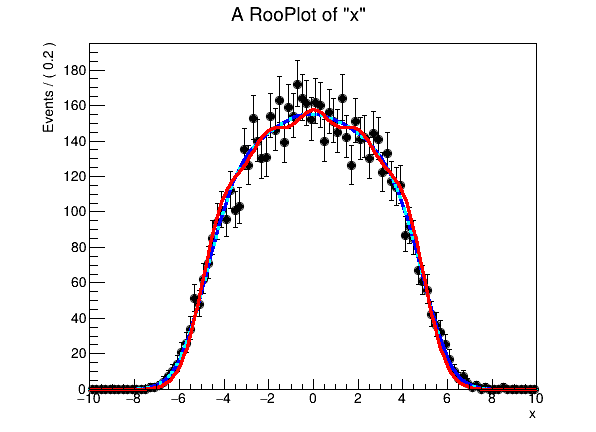

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()